## 概率论公理
*概率*（probability）可以被认为是将集合映射到真实值的函数。
在给定的样本空间$\mathcal{S}$中，事件$\mathcal{A}$的概率，
表示为$P(\mathcal{A})$，满足以下属性：

* 对于任意事件$\mathcal{A}$，其概率从不会是负数，即$P(\mathcal{A}) \geq 0$；
* 整个样本空间的概率为$1$，即$P(\mathcal{S}) = 1$；
* 对于*互斥*（mutually exclusive）事件（对于所有$i \neq j$都有$\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$）的任意一个可数序列$\mathcal{A}_1, \mathcal{A}_2, \ldots$，序列中任意一个事件发生的概率等于它们各自发生的概率之和，即$P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$。

## 联合概率
$P(A=a,B=b)$

给定任意值$a$和$b$，联合概率可以回答：$A=a$和$B=b$同时满足的概率是多少？

对于任何$a$和$b$的取值，$P(A = a, B=b) \leq P(A=a)$。

## 条件概率
$0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。
我们称这个比率为*条件概率*（conditional probability），
并用$P(B=b \mid A=a)$表示它：它是$B=b$的概率，前提是$A=a$已发生。

### 贝叶斯定理
根据*乘法法则*（multiplication rule ）可得到$P(A, B) = P(B \mid A) P(A)$。
根据对称性，可得到$P(A, B) = P(A \mid B) P(B)$。
假设$P(B)>0$，求解其中一个条件变量，我们得到

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

其中$P(A, B)$是一个*联合分布*（joint distribution），
$P(A \mid B)$是一个*条件分布*（conditional distribution）。
这种分布可以在给定值$A = a, B=b$上进行求值。

## 边际化
为了能进行事件概率求和，需要*求和法则*（sum rule），
即$B$的概率相当于计算$A$的所有可能选择，并将所有选择的联合概率聚合在一起：

$$P(B) = \sum_{A} P(A, B),$$

这也称为*边际化*（marginalization）。
边际化结果的概率或分布称为*边际概率*（marginal probability）
或*边际分布*（marginal distribution）。

### 独立性
如果两个随机变量$A$和$B$是独立的，意味着事件$A$的发生跟$B$事件的发生无关。
在这种情况下，通常将这一点表述为$A \perp  B$。
根据贝叶斯定理，马上就能同样得到$P(A \mid B) = P(A)$。
在所有其他情况下，我们称$A$和$B$依赖。

由于$P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$等价于$P(A, B) = P(A)P(B)$，
因此两个随机变量是独立的，当且仅当两个随机变量的联合分布是其各自分布的乘积。
同样地，给定另一个随机变量$C$时，两个随机变量$A$和$B$是*条件独立的*（conditionally independent），
当且仅当$P(A, B \mid C) = P(A \mid C)P(B \mid C)$。
这个情况表示为$A \perp B \mid C$。

## 期望和方差
一个随机变量$X$的*期望*（expectation，或平均值（average））表示为

$$E[X] = \sum_{x} x P(X = x).$$

当函数$f(x)$的输入是从分布$P$中抽取的随机变量时，$f(x)$的期望值为

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$

在许多情况下，我们希望衡量随机变量$X$与其期望值的偏置。这可以通过方差来量化

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$

方差的平方根被称为*标准差*（standard deviation）。

随机变量函数的方差衡量的是：当从该随机变量分布中采样不同值$x$时，
函数值偏离该函数的期望的程度：

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$


## 模拟投掷骰子的概率随投掷次数增加的变化

In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

为了抽取像本，即掷骰子，我们只需为了抽取一个样本，
输出是另一个相同长度的向量：它在索引$i$处的值是采样结果中$i$出现的次数。

In [3]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

使用PyTorch框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组

In [5]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 2., 0., 3., 1., 1.])

模拟1000次投掷，
然后统计1000次投掷后，每个数字被投中了多少次。

In [6]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1650, 0.1650, 0.1720, 0.1750, 0.1610, 0.1620])

进行500组实验，每组抽取10个样本。

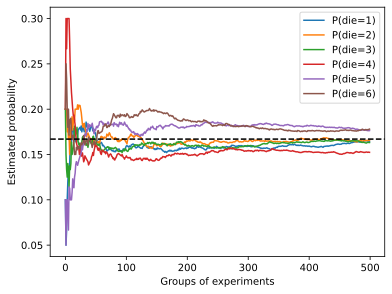

In [8]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。
当我们通过更多的实验获得更多的数据时，这$6$条实体曲线向真实概率收敛。